# Knight moves 6

In [191]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import random
from itertools import permutations
from matplotlib.colors import ListedColormap, BoundaryNorm
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,Image,HTML

# Knight moves 6

In [187]:
# Define the grid layout
grid = [
    ['A', 'B', 'B', 'C', 'C', 'C'],
    ['A', 'B', 'B', 'C', 'C', 'C'],
    ['A', 'A', 'B', 'B', 'C', 'C'],
    ['A', 'A', 'B', 'B', 'C', 'C'],
    ['A', 'A', 'A', 'B', 'B', 'C'],
    ['A', 'A', 'A', 'B', 'B', 'C']
]

# Map grid coordinates to values for easier referencing
rows = [1, 2, 3, 4, 5, 6]
columns = ['a', 'b', 'c', 'd', 'e', 'f']

def get_knight_moves(position,N=6):
    i,j = position
    moves=[(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    return [(x+i,y+j) for x,y in moves if x+i >=0 and x+i<N and y+j>=0 and y+j<N ]

# Recursive function to find all valid paths
def find_paths(start, end, path=None, max_steps=10):
    if path is None:
        path = [start]  # Initialize the path with the start position
    if start == end:
        return [path]
    if len(path) >= max_steps:
        return []
    
    valid_paths = []
    for move in get_knight_moves(start):
        if move not in path:  # Avoid revisiting squares
            new_path = path + [move]
            valid_paths += find_paths(move, end, new_path, max_steps)
    return valid_paths

# Function to compute score for a single path
def compute_score(path, values, grid):
    score = values['A']  # Start with A points
    for i in range(1, len(path)):
        prev_cell = path[i-1]
        current_cell = path[i]
        prev_value = grid[prev_cell[0]][prev_cell[1]]
        current_value = grid[current_cell[0]][current_cell[1]]

        if prev_value != current_value:
            score *= values[current_value]
        else:
            score += values[current_value]
    return score

In [188]:
# Define all possible distinct values for A, B, C
possible_values = [i for i in range(1, 50)]

# Find paths and check scores
def solve_puzzle(grid):
    i = 0
    Min_comb_abc = [50]
    Comb = {}
    Integers = {}
    Paths = {}
    valid_combinations = [(A, B, C) for A, B, C in permutations(range(1, 50), 3) if A + B + C < 50]
    for A, B, C in valid_combinations:

        if (A + B + C) < min(Min_comb_abc):
            values = {'A': A, 'B': B, 'C': C}

            # Find paths from a1 to f6 and a6 to f1
            path1 = find_paths((0, 0), (5, 5))  # a1 to f6
            path2 = find_paths((5, 0), (0, 5))  # a6 to f1

            # Check if any path scores exactly 2024 points
            for p1 in path1:
                score1 = compute_score(p1, values,grid)
                if score1 == 2024:
                    for p2 in path2:
                        score2 = compute_score(p2, values,grid)
                        if score2 == 2024 and A + B + C < 50:

                            Min_comb_abc.append(A+B+C)

                            Integers["A"] = A
                            Integers["B"] = B
                            Integers["C"] = C

                            Paths["p1"] = p1
                            Paths["p2"] = p2

                            Comb[f"Integers {i}"] = Integers
                            Comb[f"Paths {i}"] = Paths
                            Comb[f"Sum {i}"] = A + B + C

                            #print(f"Solution: A={A}, B={B}, C={C}")
                            #print(f"Path 1: {p1}, Path 2: {p2}")
                            #return Integers, Paths
    return Comb

In [178]:
Final = solve_puzzle(grid=grid)

In [179]:
Final

{'Integers 0': {'A': 2, 'B': 5, 'C': 4},
 'Paths 0': {'p1': [(0, 0),
   (2, 1),
   (0, 2),
   (2, 3),
   (3, 5),
   (4, 3),
   (2, 2),
   (3, 4),
   (5, 5)],
  'p2': [(5, 0),
   (3, 1),
   (1, 2),
   (3, 3),
   (1, 4),
   (2, 2),
   (0, 1),
   (1, 3),
   (0, 5)]},
 'Sum 0': 11}

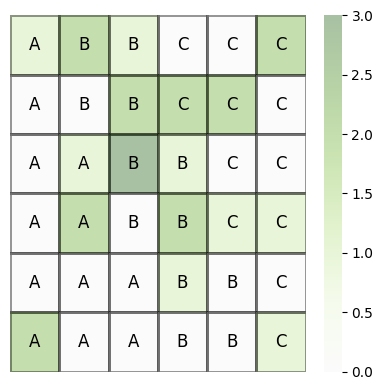

In [185]:
# Custom colors for the heatmap


def output(Paths,grid):

    path_grid = np.zeros((6,6))

    path1 = Paths["p1"]
    path2 = Paths["p2"]

    for square in path1:
        path_grid[square] += 1

    for square in path2:
        path_grid[square] += 2

    colors = ['white', 'red', 'blue', 'purple']
    cmap = ListedColormap(colors)
    norm = BoundaryNorm([0, 1, 2, 3, 4], cmap.N)

    '''
    for path in Paths.values():
        for square in path:
            path_grid[square] += 1
    '''
    fig,ax = plt.subplots(1,1,figsize=(4,4))    
    x = np.array((grid).astype('str'))
    x[x=="0"] ="-"
    ax =sns.heatmap(path_grid,annot=x,cbar=True,cmap='PiYG',fmt="",center=0,
                    linewidths=1,linecolor="k",annot_kws={"size":12,"color":"k"},alpha=.4,)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

Paths = Final["Paths 0"]
output(Paths,np.array(grid))